### 1. How to generate uniform, perpendicular, attractive, repulse,tangential forces for a robot and obstacles with known positions? 

1) Uniform:

F(q)=constant vector

2) Perpendicular

F(q)=constant vector (Vertical with obstacles in the picture)

3) Attractive:($\epsilon$ is Scale factor)

$U(q)=\epsilon \frac{1}{2}||q-q_{goal}||^2$

$F(q)=-\nabla U(q)=-\epsilon(q-q_{goal})$

4) Repulse

$U(q)=\epsilon \frac{1}{2}||q-q_{goal}||^2$

$F(q)=\nabla U(q)=\epsilon(q-q_{goal})$

5) tangential 

F(q)= K (K is vector has a constant length and the direction of K is vertical with the vector bewteen agent and goal)

### 2.Please simulate the above force fields, and plot the vector force fields. (provide codes and plots of force fields)

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as pa
from math import sqrt
%matplotlib inline

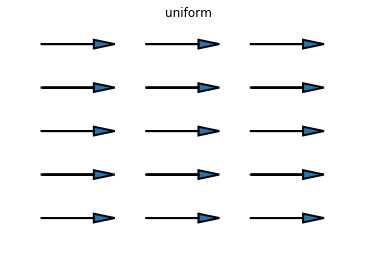

In [100]:
fig, ax = plt.subplots()
def init_uni():
    for i in range(3):
        for j in range(5):
            ax.arrow(i,j,0.5,0,head_width=0.2, head_length=0.2,linewidth=2)
    ax.set_xlim(-0.2,3)
    ax.set_ylim(-0.5,4.5)
    plt.axis('off')
    plt.title('uniform')
init_uni()
plt.show()

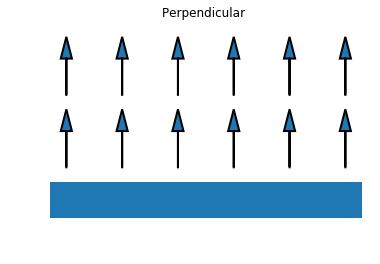

In [110]:
fig, ax = plt.subplots()
def init_per():
    for i in range(6):
        for j in range(2):
            ax.arrow(i,j,0,0.5,head_width=0.2, head_length=0.3,linewidth=2)
    ax.set_xlim(-0.5,5.5)
    ax.set_ylim(-1,2)
    rect = pa.Rectangle((-0.3,-0.7),5.6,0.5,fill=True)
    ax.add_patch(rect)
    plt.title('Perpendicular ')
    plt.axis('off')
init_per()
plt.show()

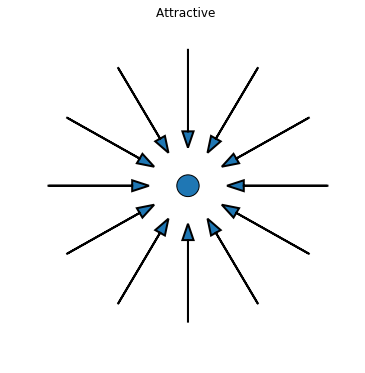

In [9]:
fig, ax = plt.subplots(figsize=(6,6))
def init_att():
    ax.set_xlim(0,6)
    ax.set_ylim(0,6)
    circle = pa.Circle((3,3),0.2,fill=True,edgecolor='black')
    for i in np.arange(0,2*np.pi,np.pi/6):
        x = 3+2.5*np.cos(i)
        y = 3+2.5*np.sin(i)
        ax.arrow(x,y,-1.5*np.cos(i),-1.5*np.sin(i),head_width=0.2, head_length=0.3,linewidth=2)
    ax.add_patch(circle)
    plt.title('Attractive ')
    plt.axis('off')
init_att()
plt.show()

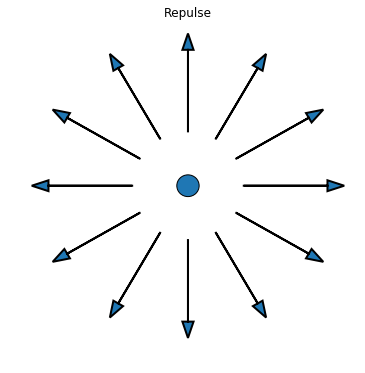

In [112]:
fig, ax = plt.subplots(figsize=(6,6))
def init_rep():
    ax.set_xlim(0,6)
    ax.set_ylim(0,6)
    circle = pa.Circle((3,3),0.2,fill=True,edgecolor='black')
    for i in np.arange(0,2*np.pi,np.pi/6):
        x = 3+2.5*np.cos(i)
        y = 3+2.5*np.sin(i)
        ax.arrow(x-1.5*np.cos(i),y-1.5*np.sin(i),1.5*np.cos(i),1.5*np.sin(i),head_width=0.2, head_length=0.3,linewidth=2)
    ax.add_patch(circle)
    plt.title('Repulse')
    plt.axis('off')
init_rep()
plt.show()

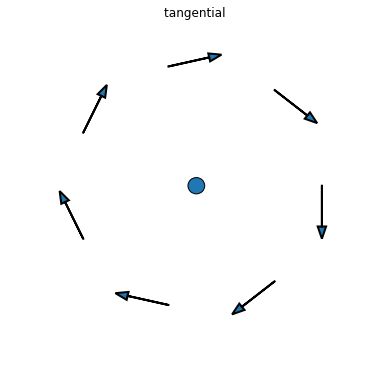

In [113]:
fig, ax = plt.subplots(figsize=(6,6))
def init_tan():
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    circle = pa.Circle((0,0),0.2,fill=True,edgecolor='black')
    for i in np.arange(0,2*np.pi,np.pi/3.5):
        x = 3*np.cos(i)
        y = 3*np.sin(i)
        l = 1
        ax.arrow(x,y,l*np.sin(i),-l*np.cos(i),head_width=0.2, head_length=0.3,linewidth=2)
    ax.add_patch(circle)
    plt.title('tangential ')
    plt.axis('off')
init_tan()
plt.show()

### 3.Please simulate the motions of a robot for given those forcefields. (Provide codes and Plots of simulation results)


simulation results are in gif file

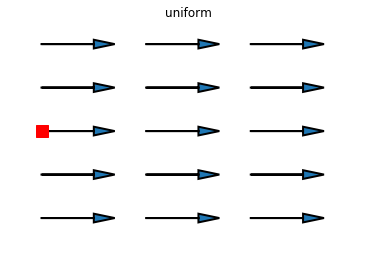

In [122]:
fig, ax = plt.subplots()
dot, = ax.plot([], [], 'rs',ms=12)
def gen_dot_uni():
    init_x = 0
    a = 0.05 # constant force = constant Acceleration
    for i in np.linspace(0, 14, 50):
        newdot = init_x+a*i*i/2
        yield newdot
def update_dot_uni(newd):
    dot.set_data(newd, 2)
    return dot,

init_uni()
ani = FuncAnimation(fig, update_dot_uni, frames = gen_dot_uni, interval = 100)#, init_func=init)
ani.save('uniform.gif', writer='imagemagick', fps=30)
plt.show()
#robot accelerate with constant acceleration#

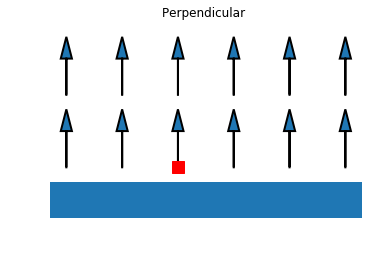

In [115]:
fig, ax = plt.subplots()
dot, = ax.plot([], [], 'rs',ms=12)
def gen_dot_uni():
    init_y = 0
    a = 0.05 # constant force = constant Acceleration
    for i in np.linspace(0, 8.9, 50):
        newdot = init_y+a*i*i/2
        yield newdot
def update_dot_uni(newd):
    dot.set_data(2, newd)
    return dot,
init_per()
ani = FuncAnimation(fig, update_dot_uni, frames = gen_dot_uni, interval = 100)#, init_func=init)
ani.save('perpendicular.gif', writer='imagemagick', fps=30)
plt.show()

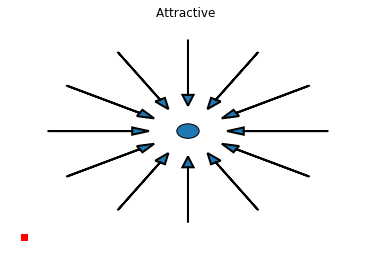

In [18]:
fig, ax = plt.subplots()
dot, = ax.plot([], [], 'rs',ms=12)
def gen_dot_att():
    r=0
    epsilon,m,step=0.3,2,50
    v=0
    for i in np.linspace(0, m, step):
        a = epsilon*(9-r)
        r += 1/2*a*(m/step)**2 + v*(m/step)
        v += a*(m/step)
        yield r
def update_dot_att(r):
    dot.set_data(r/np.sqrt(2), r/np.sqrt(2))
    return dot,
init_att()
ani = FuncAnimation(fig, update_dot_att, 
                              frames = gen_dot_att, interval = 100)#, init_func=init)
ani.save('attractive.gif', writer='imagemagick', fps=30)
plt.show()
# robot accelerate by the attraction of goal, while decelerate when agent pass goal

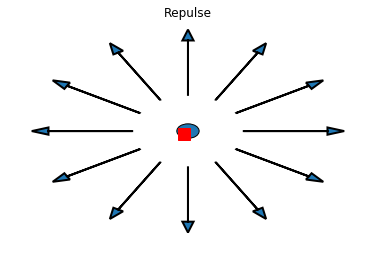

In [131]:
fig, ax = plt.subplots()
dot, = ax.plot([], [], 'rs',ms=12)
def gen_dot_rep():
    r=0.1
    epsilon,m,step=1,21,50
    for i in np.linspace(0, m, step):
        a = epsilon*r
        r += 1/2*a*(m/step)**2
        yield r
def update_dot_rep(newd):
    dot.set_data(3-r/np.sqrt(2), 3-r/np.sqrt(2))
    return dot,
init_rep()
ani = FuncAnimation(fig, update_dot_rep, 
                              frames = gen_dot_rep, interval = 100)#, init_func=init)
ani.save('rep.gif', writer='imagemagick', fps=30)
plt.show()

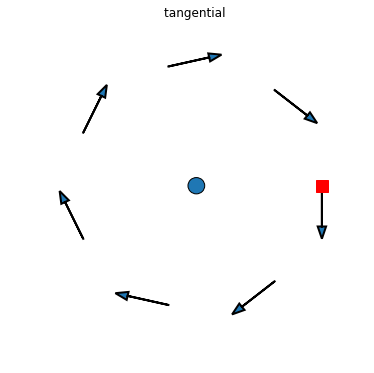

In [136]:
fig, ax = plt.subplots(figsize=(6,6))
dot, = ax.plot([], [], 'rs',ms=12)
def gen_dot_tan():
    r = 3
    for i in np.linspace(0,2*np.pi,100):
        newd=[r*np.cos(i),-r*np.sin(i)]
        yield newd
def update_dot_tan(newd):
    dot.set_data(newd[0], newd[1])
    return dot,
init_tan()
ani = FuncAnimation(fig, update_dot_tan, 
                              frames = gen_dot_tan, interval = 100)#, init_func=init)
ani.save('tangential.gif', writer='imagemagick', fps=30)
plt.show()

# Robot doing uniform circular motion 

### 4.Simulate a robot that can reach the goal without sticking into the a local trap. (Provide codes and simulation results with parameter optimization and analysis)

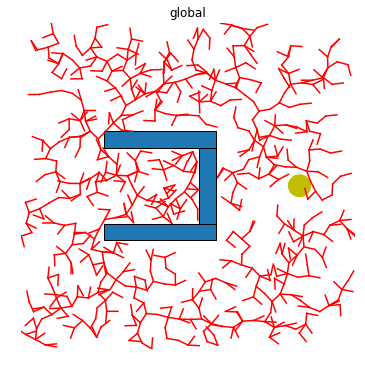

In [7]:
#initialize map
def init_glo():
    ax.set_xlim(0,6)
    ax.set_ylim(0,6)
    rect1 = pa.Rectangle((1.5,2),2,0.3,fill=True,edgecolor='black')
    rect2 = pa.Rectangle((1.5,3.7),2,0.3,fill=True,edgecolor='black')
    rect3 = pa.Rectangle((3.2,2.3),0.3,1.4,fill=True,edgecolor='black')
    circle = pa.Circle((5,3),0.2,fill=True,color='y')
    for rect in [rect1,rect2,rect3,circle]:
        ax.add_patch(rect)
    plt.title('global')
    plt.axis('off')

# Verify that the newly generated point is inside the obstacle
def check(p):
    if 1.5<=p[0]<=3.5 and 2<=p[1]<=4:
        if 1.5<p[0]<3.2 and 2.3<p[1]<3.7:
            return True
        else:
            return False
    else:
        return True

# distance between two point
def dis(p1,p2):
    return sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

# generate possible route
def gen_route():
    tol = 0.2 
    step = 0.2 
    flag = True
    while flag:
        while True:
            prand = [random.random()*6,random.random()*6]
            pnear = line[1][np.argmin([dis(p,prand) for p in line[1]])]
            dnear = dis(pnear,prand)
            pnew = [(step*prand[0]+(dnear-step)*pnear[0])/dnear,
                    (step*prand[1]+(dnear-step)*pnear[1])/dnear]
            if check(pnew):
                break
        line[0].append(pnear)
        line[1].append(pnew)
        if dis(pnew,[5,3])<=tol:            
            flag = False

# choose shortest route
def choose_route():
    route = []
    begin = line[0][-1]
    route.append(line[1][-1])
    while True:
        route.append(begin)
        if begin == [2,3]:
            break
        i = line[1].index(begin)
        begin = line[0][i]
    return route
            
fig, ax = plt.subplots(figsize=(6,6))
dot, = ax.plot([], [], 'gs',ms=12)
init_glo()
line = [[[2,3]],[[2,3]]]
gen_route()
for i in range(len(line[0])):
    plt.plot([line[0][i][0],line[1][i][0]],[line[0][i][1],line[1][i][1]],c='r')

route = choose_route()
plt.show()
       
      
def update_dot_glo(newd):
    dot.set_data(newd[0], newd[1])
    return dot,

ani = FuncAnimation(fig, update_dot_glo, 
                              frames = route[::-1], interval =200)#, init_func=init)
ani.save('global2.gif', writer='imagemagick', fps=30)
plt.show()

# see the result in "global2.gif"